In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def predict_category(s, m, t):
    pred = m.predict([s])
    return t[pred[0]]

In [5]:
train = fetch_20newsgroups(subset='train')
test = fetch_20newsgroups(subset='test')


In [6]:
categories = ['rec.autos', 'rec.motorcycles','sci.space', 'sci.med']
train = fetch_20newsgroups(subset='train',categories=categories,
                           remove=('headers', 'footers','quotes'))
test = fetch_20newsgroups(subset='test',categories=categories,
                          remove=('headers', 'footers','quotes'))

In [8]:
targets = train.target_names
mnb_clf = make_pipeline(TfidfVectorizer(), MultinomialNB())
mnb_clf.fit(train.data, train.target)
labels = mnb_clf.predict(test.data)
f1 = f1_score(test.target, labels, average='micro')
print ('f1_score', f1)
cm = confusion_matrix(test.target, labels)

f1_score 0.8440656565656567


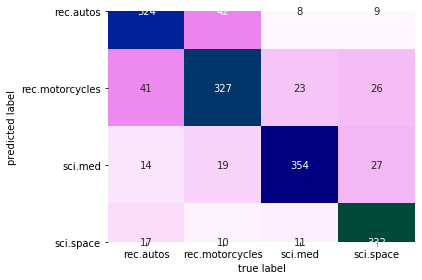

In [9]:
plt.figure('confusion matrix')
sns.heatmap(cm.T, square=True, annot=True, fmt='d',cmap='gist_ncar_r',
            xticklabels=train.target_names,yticklabels=train.target_names, cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.tight_layout()

In [10]:
print ('***PREDICTIONS***:')
y_pred = predict_category('payload on the mars rover',mnb_clf, targets)
print (y_pred)
y_pred = predict_category('car broke down on the highway',mnb_clf, targets)
print (y_pred)
y_pred = predict_category('dad died of cancer',mnb_clf, targets)
print (y_pred)

***PREDICTIONS***:
sci.space
rec.autos
sci.med
